# 2023 Analysis


In [2]:
import pandas as pd

# Import the 2023_results_cleaned.csv file
df = pd.read_csv(
    "2023_results_cleaned.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date_1",
        "preferred_entry_date_2",
        "preferred_entry_date_3",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df.head()

,preferred_entry_date_1,preferred_zone_1,minimum_acceptable_group_size_1,preferred_entry_date_2,preferred_zone_2,minimum_acceptable_group_size_2,preferred_entry_date_3,preferred_zone_3,minimum_acceptable_group_size_3,processing_sequence,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,state
0,2023-06-18,Core Enchantment Zone,2,2023-06-11,Core Enchantment Zone,2,2023-06-04,Core Enchantment Zone,2,438,Awarded,1,2023-06-18,Core Enchantment Zone,2,OR
1,2023-08-21,Core Enchantment Zone,8,2023-08-23,Core Enchantment Zone,8,2023-08-24,Core Enchantment Zone,8,16219,Unsuccessful,0,1970-01-01,N/A,0,WA
2,2023-06-09,Core Enchantment Zone,4,2023-07-21,Colchuck Zone,4,2023-08-04,Colchuck Zone,4,35433,Unsuccessful,0,1970-01-01,N/A,0,WA
3,2023-07-06,Core Enchantment Zone,2,2023-07-20,Core Enchantment Zone,2,2023-08-03,Core Enchantment Zone,2,22536,Unsuccessful,0,1970-01-01,N/A,0,WA
4,2023-09-09,Core Enchantment Zone,3,2023-08-22,Core Enchantment Zone,3,2023-08-23,Eightmile/Caroline Zone,3,31307,Unsuccessful,0,1970-01-01,N/A,0,WA


## The **Processing Sequence** Column


The `Processing Sequence` column is a new column in the data for 2023. This column is presumed to represent the order in which the lottery looked at the applicant's application.

This assumption is backed up by noting that more application's were awarded to the lower sequence numbers. Unforunately, `Cancelled` permits were given a sequence processing of zero, meaning we aren't able to examine they're awarded date, zone, or group size. Those applications were removed in the cleaning process.

The below graph shows us the randomized—unbiased—order in which applications are awarded.


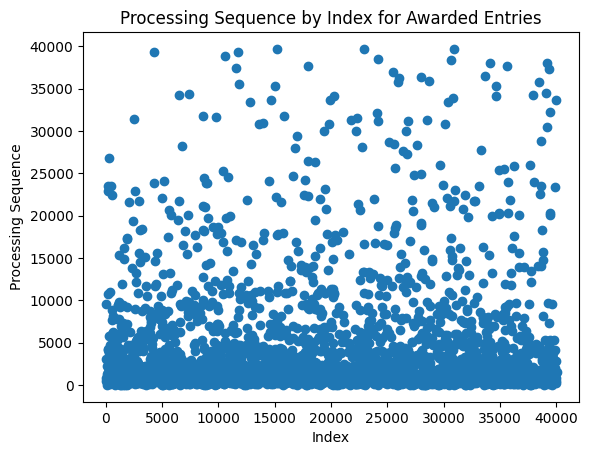

In [3]:
# Create a scatter splot with the index on the x-axis and the processing_sequence on the y-axis
import matplotlib.pyplot as plt

# Filter the data for the Awarded entries
awarded_entries = df[df["results_status"] == "Awarded"]

plt.scatter(awarded_entries.index, awarded_entries["processing_sequence"])

plt.xlabel("Index")

plt.ylabel("Processing Sequence")

plt.title("Processing Sequence by Index for Awarded Entries")

# Save plot to PNG
plt.savefig("processing_sequence_by_index.png")

plt.show()

In [4]:
print(
    "The first application awarded was given to a group of 8 from NY \nwith an entry date of Sept. 10 into the Core Enchantments Zone."
)

# View the application with the 1st processing sequence
df[df["processing_sequence"] == 1]

The first application awarded was given to a group of 8 from NY 
with an entry date of Sept. 10 into the Core Enchantments Zone.


,preferred_entry_date_1,preferred_zone_1,minimum_acceptable_group_size_1,preferred_entry_date_2,preferred_zone_2,minimum_acceptable_group_size_2,preferred_entry_date_3,preferred_zone_3,minimum_acceptable_group_size_3,processing_sequence,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,state
20444,2023-09-10,Core Enchantment Zone,8,2023-09-17,Core Enchantment Zone,8,2023-09-24,Core Enchantment Zone,8,1,Awarded,1,2023-09-10,Core Enchantment Zone,8,NY


In [5]:
print(
    "The last ten applications awarded by processing sequence.\nA group from PA was awarded a Core Enchantment Zone Permit for Oct. 30 \ndespite 38,039 applications going before them."
)
# Sort the awarded entries and then filter for the last ten entries awarded by processing sequence
awarded_entries.sort_values("processing_sequence", ascending=False).head(10)

The last ten applications awarded by processing sequence.
A group from PA was awarded a Core Enchantment Zone Permit for Oct. 30 
despite 38,039 applications going before them.


,preferred_entry_date_1,preferred_zone_1,minimum_acceptable_group_size_1,preferred_entry_date_2,preferred_zone_2,minimum_acceptable_group_size_2,preferred_entry_date_3,preferred_zone_3,minimum_acceptable_group_size_3,processing_sequence,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,state
22916,2023-05-24,Stuart Zone,2,2023-05-25,Stuart Zone,2,2023-05-26,Stuart Zone,2,39678,Awarded,2,2023-05-25,Stuart Zone,2,AR
30951,2023-10-26,Eightmile/Caroline Zone,4,2023-10-26,Snow Zone,4,2023-10-26,Core Enchantment Zone,4,39657,Awarded,1,2023-10-26,Eightmile/Caroline Zone,4,WA
15194,2023-10-18,Core Enchantment Zone,4,2023-10-18,Snow Zone,4,2023-10-18,Colchuck Zone,4,39619,Awarded,2,2023-10-18,Snow Zone,4,IL
4329,2023-06-05,Colchuck Zone,2,2023-06-05,Eightmile/Caroline Zone,2,2023-06-05,Stuart Zone,2,39292,Awarded,2,2023-06-05,Eightmile/Caroline Zone,2,IL
11719,2023-10-17,Snow Zone,8,2023-07-21,Colchuck Zone,8,2023-09-19,Snow Zone,8,39257,Awarded,1,2023-10-17,Snow Zone,8,WA
10591,2023-10-19,Core Enchantment Zone,2,2023-10-19,Snow Zone,2,2023-10-19,Colchuck Zone,2,38812,Awarded,2,2023-10-19,Snow Zone,2,OH
24193,2023-10-10,Colchuck Zone,2,2023-10-17,Colchuck Zone,2,2023-10-24,Colchuck Zone,2,38505,Awarded,3,2023-10-24,Colchuck Zone,2,NY
30695,2023-05-30,Core Enchantment Zone,2,2023-05-31,Snow Zone,2,2023-06-02,Stuart Zone,2,38403,Awarded,2,2023-05-31,Snow Zone,2,NC
39136,2023-08-20,Core Enchantment Zone,6,2023-10-30,Core Enchantment Zone,6,1970-01-01,N/A,0,38040,Awarded,2,2023-10-30,Core Enchantment Zone,6,PA
34102,2023-10-21,Snow Zone,8,2023-10-22,Snow Zone,8,2023-10-21,Snow Zone,8,37990,Awarded,2,2023-10-22,Snow Zone,8,CA


## Processing Sequence Implications

The implications of the `Processing Sequence` column is that every application has a chance to win. Whereas in prior year analyses that assumption was not made. Therefore, the _skipped entries_ data subset is expanded to include all failed application entries, not just application entries where the preferred option was less than the awarded option.


## Failed Application Test

Let's find a failed application and see if we can find preceding applications that were awarded the failed preference.


In [6]:
# Import the 2023 results split csv file
df_split = pd.read_csv(
    "2023_results_split.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split.head()

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Core Enchantment Zone,2023-06-18,2,Awarded,1,2023-06-18,Core Enchantment Zone,2,438,OR,True,1,June,Sunday
1,Core Enchantment Zone,2023-08-21,8,Unsuccessful,0,1970-01-01,N/A,0,16219,WA,False,1,August,Monday
2,Core Enchantment Zone,2023-06-09,4,Unsuccessful,0,1970-01-01,N/A,0,35433,WA,False,1,June,Friday
3,Core Enchantment Zone,2023-07-06,2,Unsuccessful,0,1970-01-01,N/A,0,22536,WA,False,1,July,Thursday
4,Core Enchantment Zone,2023-09-09,3,Unsuccessful,0,1970-01-01,N/A,0,31307,WA,False,1,September,Saturday


In [7]:
# Randomly select an Unsuccessful entry
unsuccessful_entry = df_split[df_split["results_status"] == "Unsuccessful"].sample(
    random_state=42
)

print(
    f"The unsuccessful entry was for a \ngroup of {unsuccessful_entry['minimum_acceptable_group_size'].values[0]} \nfrom {unsuccessful_entry['state'].values[0]} \nfor the {unsuccessful_entry['preferred_zone'].values[0]} \non {unsuccessful_entry["preferred_entry_date"].values[0]} \nwith a processing sequence of {unsuccessful_entry['processing_sequence'].values[0]}."
)
unsuccessful_entry

The unsuccessful entry was for a 
group of 2 
from MI 
for the Core Enchantment Zone 
on 2023-06-19T00:00:00.000000000 
with a processing sequence of 4194.


,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
32491,Core Enchantment Zone,2023-06-19,2,Unsuccessful,0,1970-01-01,N/A,0,4194,MI,False,1,June,Monday


In [8]:
# Filter df_split for entries that match the random entry data but with a higher processing sequence number
entry_dates_match_filter = (
    df_split["preferred_entry_date"]
    == unsuccessful_entry["preferred_entry_date"].values[0]
)
processing_sequence_filter = (
    df_split["processing_sequence"]
    < unsuccessful_entry["processing_sequence"].values[0]
)
zone_filter = (
    df_split["awarded_entrance_code_name"]
    == unsuccessful_entry["preferred_zone"].values[0]
)
awarded_filter = df_split["awarded"] == True

winners_filter = (
    entry_dates_match_filter & processing_sequence_filter & zone_filter & awarded_filter
)

higher_sequence_winners = df_split[winners_filter]

print(
    f"There were {len(higher_sequence_winners)} entries that were awarded with a higher processing sequence number \nthat matched the same parameters as our unsuccessful entry."
)

higher_sequence_winners

There were 4 entries that were awarded with a higher processing sequence number 
that matched the same parameters as our unsuccessful entry.


,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
12087,Core Enchantment Zone,2023-06-19,3,Awarded,1,2023-06-19,Core Enchantment Zone,3,607,TX,True,1,June,Monday
16655,Core Enchantment Zone,2023-06-19,3,Awarded,1,2023-06-19,Core Enchantment Zone,3,1835,WA,True,1,June,Monday
25593,Core Enchantment Zone,2023-06-19,6,Awarded,1,2023-06-19,Core Enchantment Zone,6,896,CA,True,1,June,Monday
31959,Core Enchantment Zone,2023-06-19,4,Awarded,1,2023-06-19,Core Enchantment Zone,4,665,GA,True,1,June,Monday


Four application entries were awarded before the randomly sampled unsuccessful applicant had a chance. The awarded permit group sizes add up to 16, which means the Core Zone was maxed out on this particular Monday in June when the lottery hit sequence number 4194 (a relatively early number).

Having the sequence number allows us to examine the lottery results in a new light!


# The **State** Column


The 2023 application data also includes a `State` column noting where the applicant is from. This column includes entries outside the US. It won't play a role in our analysis, but it's a fun and interesting column to examine.


In [9]:
# Pretty print the list of unique entries by state for awarded entries
print("Unique awarded entries by state:")
print(awarded_entries["state"].unique())

print("\n")

print("Mazowieckie is in Poland.\n")
print("Bavaria is in Germany.\n")
print("London is in the UK.\n")
print("Espoo is in Finland.\n")
print("centre Val de Loire is in France.\n")

Unique awarded entries by state:
['OR' 'DC' 'WA' 'NY' 'TX' 'CA' 'ID' 'AR' 'IL' 'MT' 'PA' 'VA' 'BC' 'FL'
 'TN' 'UT' 'GA' 'CO' 'NJ' 'MD' 'NH' 'OH' 'HI' 'MO' 'IA' 'MI' 'berkshire'
 'British Columbia' 'DE' 'RI' 'WI' 'MA' 'NV' 'Oregon' 'WV'
 'centre Val de Loire' 'IN' 'AZ' 'MN' 'KY' 'Espoo' 'SC'
 'British Columbia (BC)' 'Wa' 'Mazowieckie' 'NE' 'CT' 'WY' 'AK' 'NC' 'LA'
 'OK' 'Nord' 'MS' 'NM' 'bc' 'Bavaria' 'London']


Mazowieckie is in Poland.

Bavaria is in Germany.

London is in the UK.

Espoo is in Finland.

centre Val de Loire is in France.



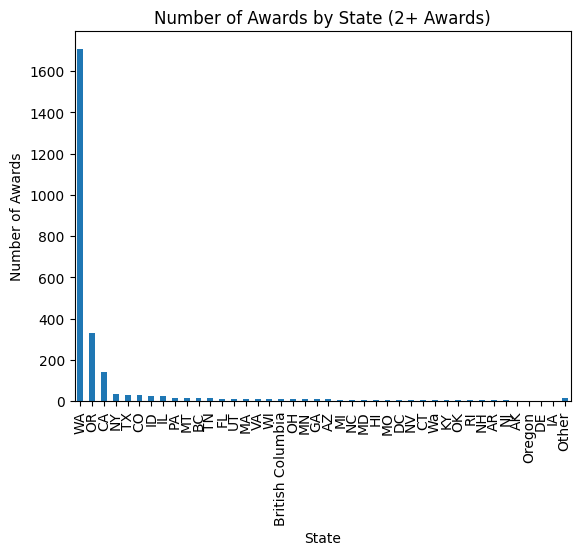

In [10]:
# Create a bar chart showing the awarded entries by state
state_counts = awarded_entries["state"].value_counts()

# Add up all the states with just one awarded entry
other_states = state_counts[state_counts == 1].sum()

# Remove all the states with just one awarded entry
state_counts = state_counts[state_counts > 1]

# Add the other states to the state_counts Series
state_counts["Other"] = other_states

state_counts.plot(kind="bar")

plt.xlabel("State")

plt.ylabel("Number of Awards")

plt.title("Number of Awards by State (2+ Awards)")

plt.show()

## Full Application Analysis


In [11]:
# Get the total number of applications in the dataset
total_applications = len(df)

# Print the result
print(f"Total number of applications in 2023: {total_applications}")

total_applications_2022 = 36827

# Calculate the increase in applications from 2022 to 2023 as a percentage
increase_in_applications = (
    (total_applications - total_applications_2022) / total_applications_2022 * 100
)

# Print the result
print(
    f"Percentage increase in applications from 2022 to 2023: {increase_in_applications:.2f}% ({total_applications - total_applications_2022})"
)

Total number of applications in 2023: 40031
Percentage increase in applications from 2022 to 2023: 8.70% (3204)


In [12]:
# Get the total number of awarded permits
total_awarded = len(df[df["results_status"] == "Awarded"])

# Print the result
print(f"Total number of awarded permits in 2023: {total_awarded}")

Total number of awarded permits in 2023: 2558


In [13]:
# Probability of getting an awarded permit
probability_awarded = total_awarded / total_applications

# Print the result
print(
    f"Probability of getting an awarded permit in 2023: {probability_awarded:.2%} ({total_awarded}/{total_applications})"
)

Probability of getting an awarded permit in 2023: 6.39% (2558/40031)


In [14]:
# Show awarded permits by awarded status across teh different zones
awarded = df[df["results_status"] == "Awarded"]

# Print the result
print(f"Awarded permits by zone:")

pd.crosstab(
    awarded["awarded_entrance_code_name"],
    awarded["results_status"],
)

Awarded permits by zone:


results_status,Awarded
awarded_entrance_code_name,
Colchuck Zone,354
Core Enchantment Zone,737
Eightmile/Caroline Zone,289
Eightmile/Caroline Zone (stock),30
Snow Zone,652
Stuart Zone,480
Stuart Zone (stock),16


In [15]:
# Probability you were awarded a permit for the Core Enchantment Zone
probability_core_awarded = (
    len(awarded[awarded["awarded_entrance_code_name"] == "Core Enchantment Zone"])
    / total_applications
)

# Print the result
print(
    f"Probability of getting an awarded permit for the Core Enchantment Zone in 2023: {probability_core_awarded:.2%}"
)

Probability of getting an awarded permit for the Core Enchantment Zone in 2023: 1.84%


In [16]:
# Probability of being awarded a permit given you applied for Core Zone
applied_core_zone_1_filter = df["preferred_zone_1"] == "Core Enchantment Zone"
applied_core_zone_2_filter = df["preferred_zone_2"] == "Core Enchantment Zone"
applied_core_zone_3_filter = df["preferred_zone_3"] == "Core Enchantment Zone"

applied_atleast_one_core_zone_filter = (
    applied_core_zone_1_filter | applied_core_zone_2_filter | applied_core_zone_3_filter
)

applied_core_zone = df[applied_atleast_one_core_zone_filter]

applied_awarded_core_zone = applied_core_zone[
    applied_core_zone["results_status"] == "Awarded"
]

probability_applied_awarded_core_zone = len(applied_awarded_core_zone) / len(
    applied_core_zone
)

# Print the result
print(
    f"Probability of being awarded a permit given you applied for Core Zone in 2023: {probability_applied_awarded_core_zone:.2%} ({len(applied_awarded_core_zone)}/{len(applied_core_zone)})"
)

Probability of being awarded a permit given you applied for Core Zone in 2023: 5.24% (1736/33146)


In [17]:
# Probability of being awarded a permit given you DID NOT apply for the Core Zone
did_not_apply_core_zone_filter = ~applied_atleast_one_core_zone_filter

did_not_apply_core_zone = df[did_not_apply_core_zone_filter]

did_not_apply_awarded_core_zone = did_not_apply_core_zone[
    did_not_apply_core_zone["results_status"] == "Awarded"
]

probability_did_not_apply_awarded_core_zone = len(
    did_not_apply_awarded_core_zone
) / len(did_not_apply_core_zone)

# Print the result
print(
    f"Probability of being awarded a permit given you DID NOT apply for Core Zone in 2023: {probability_did_not_apply_awarded_core_zone:.2%} ({len(did_not_apply_awarded_core_zone)}/{len(did_not_apply_core_zone)})"
)

Probability of being awarded a permit given you DID NOT apply for Core Zone in 2023: 11.94% (822/6885)


In [18]:
# Probability of being awarded a permit given you applied for only the Core Zone
division_2_na_filter = df["preferred_zone_2"] == "N/A"
division_3_na_filter = df["preferred_zone_3"] == "N/A"


only_applied_core_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & applied_core_zone_3_filter
)
only_applied_core_2_filter = (
    applied_core_zone_1_filter & division_2_na_filter & division_3_na_filter
)
only_applied_core_3_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & division_3_na_filter
)

only_applied_core = df[
    only_applied_core_filter | only_applied_core_2_filter | only_applied_core_3_filter
]

only_applied_awarded_core = only_applied_core[
    only_applied_core["results_status"] == "Awarded"
]

probability_only_applied_awarded_core = len(only_applied_awarded_core) / len(
    only_applied_core
)

# Print the result
print(
    f"Probability of being awarded a Core Zone permit given you applied for only the Core Zone in 2023: {probability_only_applied_awarded_core:.2%} ({len(only_applied_awarded_core)}/{len(only_applied_core)})"
)

Probability of being awarded a Core Zone permit given you applied for only the Core Zone in 2023: 2.83% (543/19177)


In [19]:
def sort_zone_probabilities(x):
    return x.sort(key=lambda x: x[1], reverse=True)


def create_zone_probability_dataframe(x, columns):
    return pd.DataFrame(
        x,
        columns=columns,
    )


def add_probability_percent_column(df):
    df["Probability (%)"] = df["Probability"].map("{:.2%}".format)
    return df


def zone_probabilities_to_crosstab(x, columns):
    sort_zone_probabilities(x)
    return add_probability_percent_column(create_zone_probability_dataframe(x, columns))

In [20]:
# Get the probability of being awared a permit for a zone given you applied for that zone

# Get a list of all the zones
zones_values = df["preferred_zone_1"].unique()

prob_awarded_zone_applied_for = []

# Loop over the zones and calculate the probability of being awarded a permit for each zone
for zone in zones_values:
    applied_1 = df["preferred_zone_1"] == zone
    applied_2 = df["preferred_zone_2"] == zone
    applied_3 = df["preferred_zone_3"] == zone

    zone_filter = applied_1 | applied_2 | applied_3

    applied_zone = df[zone_filter]

    total_zone = len(applied_zone)

    awarded_zone_filter = df["awarded_entrance_code_name"] == zone

    total_zone_awarded = len(df[zone_filter & awarded_zone_filter])
    prob_zone_awarded = total_zone_awarded / total_zone

    prob_awarded_zone_applied_for.append(
        [zone, prob_zone_awarded, total_zone_awarded, total_zone]
    )

    print(
        f"Probability of being awarded a permit for {zone}, given applied 1+ option in zone: {prob_zone_awarded:.2%} ({total_zone_awarded}/{total_zone})"
    )


df_prob_awarded_zone_applied_for = zone_probabilities_to_crosstab(
    prob_awarded_zone_applied_for,
    ["Zone", "Probability", "Total Awarded", "Total Applied"],
)

# Show crosstab of the new dataframe
df_prob_awarded_zone_applied_for

Probability of being awarded a permit for Core Enchantment Zone, given applied 1+ option in zone: 2.22% (737/33146)
Probability of being awarded a permit for Snow Zone, given applied 1+ option in zone: 7.07% (652/9219)
Probability of being awarded a permit for Colchuck Zone, given applied 1+ option in zone: 2.61% (354/13554)
Probability of being awarded a permit for Stuart  Zone, given applied 1+ option in zone: 9.41% (480/5101)
Probability of being awarded a permit for Eightmile/Caroline Zone, given applied 1+ option in zone: 13.95% (289/2071)
Probability of being awarded a permit for Stuart Zone (stock), given applied 1+ option in zone: 8.47% (16/189)
Probability of being awarded a permit for Eightmile/Caroline Zone (stock), given applied 1+ option in zone: 10.95% (30/274)


,Zone,Probability,Total Awarded,Total Applied,Probability (%)
0,Eightmile/Caroline Zone,0.139546,289,2071,13.95%
1,Eightmile/Caroline Zone (stock),0.109489,30,274,10.95%
2,Stuart Zone,0.094099,480,5101,9.41%
3,Stuart Zone (stock),0.084656,16,189,8.47%
4,Snow Zone,0.070724,652,9219,7.07%
5,Colchuck Zone,0.026118,354,13554,2.61%
6,Core Enchantment Zone,0.022235,737,33146,2.22%


/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_15118/3793792790.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


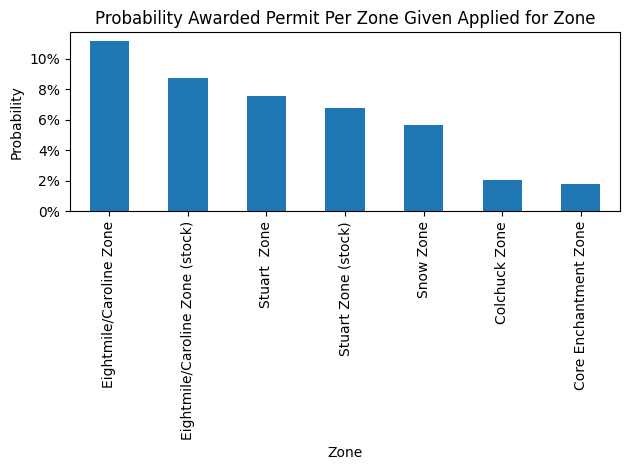

In [21]:
# Show bar chart of the probability of being awarded a permit for each zone given you applied for that zone
df_prob_awarded_zone_applied_for.set_index("Zone")["Probability"].plot(kind="bar")

plt.xlabel("Zone")

plt.ylabel("Probability")

# Show y axis as percentage
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.title("Probability Awarded Permit Per Zone Given Applied for Zone")

# Save the plot to a PNG file
# Extend bottom to show entire plot
plt.tight_layout()
plt.savefig("probability_awarded_permit_per_zone.png")

plt.show()

## Split


In [22]:
df_split.head()

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Core Enchantment Zone,2023-06-18,2,Awarded,1,2023-06-18,Core Enchantment Zone,2,438,OR,True,1,June,Sunday
1,Core Enchantment Zone,2023-08-21,8,Unsuccessful,0,1970-01-01,N/A,0,16219,WA,False,1,August,Monday
2,Core Enchantment Zone,2023-06-09,4,Unsuccessful,0,1970-01-01,N/A,0,35433,WA,False,1,June,Friday
3,Core Enchantment Zone,2023-07-06,2,Unsuccessful,0,1970-01-01,N/A,0,22536,WA,False,1,July,Thursday
4,Core Enchantment Zone,2023-09-09,3,Unsuccessful,0,1970-01-01,N/A,0,31307,WA,False,1,September,Saturday


In [23]:
# Import split skipped from csv file
df_split_skipped = pd.read_csv(
    "./2023_results_split_skipped.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split_skipped.head()

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Core Enchantment Zone,2023-08-21,8,Unsuccessful,0,1970-01-01,N/A,0,16219,WA,False,1,August,Monday
1,Core Enchantment Zone,2023-06-09,4,Unsuccessful,0,1970-01-01,N/A,0,35433,WA,False,1,June,Friday
2,Core Enchantment Zone,2023-07-06,2,Unsuccessful,0,1970-01-01,N/A,0,22536,WA,False,1,July,Thursday
3,Core Enchantment Zone,2023-09-09,3,Unsuccessful,0,1970-01-01,N/A,0,31307,WA,False,1,September,Saturday
4,Core Enchantment Zone,2023-09-13,2,Unsuccessful,0,1970-01-01,N/A,0,14673,WA,False,1,September,Wednesday


## Zone


In [24]:
# Show total split entries by zone
# Print the result
print(f"Total split entries by zone:")
df_split["preferred_zone"].value_counts()

Total split entries by zone:


preferred_zone
Core Enchantment Zone              75616
Colchuck Zone                      18876
Snow Zone                          13238
Stuart  Zone                        7203
Eightmile/Caroline Zone             2455
Eightmile/Caroline Zone (stock)      323
Stuart Zone (stock)                  214
Name: count, dtype: int64

In [25]:
# Get the total awarded permits by month
awarded_split_filter = df_split["awarded"] == True

df_split_awarded = df_split[awarded_split_filter]

In [26]:
# Show total awarded permits by zone in a dataframe
df_awarded_zone = (
    df_split_awarded["preferred_zone"].value_counts().to_frame(name="Total Awarded")
)

df_awarded_zone

,Total Awarded
preferred_zone,
Core Enchantment Zone,737
Snow Zone,652
Stuart Zone,480
Colchuck Zone,354
Eightmile/Caroline Zone,289
Eightmile/Caroline Zone (stock),30
Stuart Zone (stock),16


In [27]:
# Show total skipped by zone
df_skipped_by_zone = (
    df_split_skipped["preferred_zone"].value_counts().to_frame(name="Total Skipped")
)

df_skipped_by_zone

,Total Skipped
preferred_zone,
Core Enchantment Zone,74879
Colchuck Zone,18522
Snow Zone,12586
Stuart Zone,6723
Eightmile/Caroline Zone,2166
Eightmile/Caroline Zone (stock),293
Stuart Zone (stock),198


In [28]:
# Show AtS for zone
df_awarded_skipped_by_zone = pd.merge(
    df_awarded_zone,
    df_skipped_by_zone,
    on="preferred_zone",
)

# Calculate the AtS for each zone
df_awarded_skipped_by_zone["ratio"] = (
    df_awarded_skipped_by_zone["Total Awarded"]
    / df_awarded_skipped_by_zone["Total Skipped"]
)

# Show only two decimal places for ratio
df_awarded_skipped_by_zone["ratio"] = df_awarded_skipped_by_zone["ratio"].map(
    "{:.3f}".format
)

# Sort the dataframe by the ratio column
df_awarded_skipped_by_zone = df_awarded_skipped_by_zone.sort_values(
    by="ratio", ascending=False
)

df_awarded_skipped_by_zone

,Total Awarded,Total Skipped,ratio
preferred_zone,,,
Eightmile/Caroline Zone,289,2166,0.133
Eightmile/Caroline Zone (stock),30,293,0.102
Stuart Zone (stock),16,198,0.081
Stuart Zone,480,6723,0.071
Snow Zone,652,12586,0.052
Colchuck Zone,354,18522,0.019
Core Enchantment Zone,737,74879,0.010


## Month


In [29]:
# Show total entries by month
df_split["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       42312
July         30429
September    28200
June          9314
October       6105
May           1565
Name: count, dtype: int64

In [30]:
# Group awarded by month
df_awarded_by_month = (
    df_split_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,498
July,495
June,467
May,246
October,378
September,474


In [31]:
# Get the total of permits skipped by month
# Group skipped by month
df_skipped_by_month = (
    df_split_skipped.groupby("preferred_entry_date_month")
    .size()
    .to_frame(name="Total Skipped")
)

df_skipped_by_month

,Total Skipped
preferred_entry_date_month,
August,41814
July,29934
June,8847
May,1319
October,5727
September,27726


In [32]:
# Merge awarded and skipped by month
df_awarded_skipped_by_month = pd.merge(
    df_awarded_by_month,
    df_skipped_by_month,
    on="preferred_entry_date_month",
)

# Calculate ratio of awarded to skipped
df_awarded_skipped_by_month["ratio"] = (
    df_awarded_skipped_by_month["Total Awarded"]
    / df_awarded_skipped_by_month["Total Skipped"]
)

# Only show two decimals for ratio
df_awarded_skipped_by_month["ratio"] = df_awarded_skipped_by_month["ratio"].map(
    "{:.3f}".format
)

# Sort by ratio
df_awarded_skipped_by_month = df_awarded_skipped_by_month.sort_values(
    by="ratio", ascending=False
)

# Sort the columns
df_awarded_skipped_by_month = df_awarded_skipped_by_month[
    ["Total Awarded", "Total Skipped", "ratio"]
]

# Show dataframe
df_awarded_skipped_by_month

,Total Awarded,Total Skipped,ratio
preferred_entry_date_month,,,
May,246,1319,0.187
October,378,5727,0.066
June,467,8847,0.053
July,495,29934,0.017
September,474,27726,0.017
August,498,41814,0.012


In 2022, using the old AtS ratio calculation, September had the wosrt ratio. In 2023, not only has September jumped above August, it's nearly tied with July.


## Day of the week


In [33]:
# Show total entries by day of the week
df_split["preferred_entry_date_day"].value_counts()

preferred_entry_date_day
Friday       25785
Thursday     18694
Saturday     18367
Monday       14950
Wednesday    14005
Tuesday      13627
Sunday       12497
Name: count, dtype: int64

In [34]:
# Import the split data from 2022
df_split_2022 = pd.read_csv(
    "../2022/2022_results_split.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split_2022.head()

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance,awarded_group_size,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Core Enchantment Zone,2022-09-02,8,Unsuccessful,0,1970-01-01,N/A,0,False,1,September,Friday
1,Colchuck Zone,2022-08-15,2,Unsuccessful,0,1970-01-01,N/A,0,False,1,August,Monday
2,Snow Zone,2022-08-12,8,Unsuccessful,0,1970-01-01,N/A,0,False,1,August,Friday
3,Core Enchantment Zone,2022-07-12,2,Unsuccessful,0,1970-01-01,N/A,0,False,1,July,Tuesday
4,Stuart Zone,2022-09-03,4,Unsuccessful,0,1970-01-01,N/A,0,False,1,September,Saturday


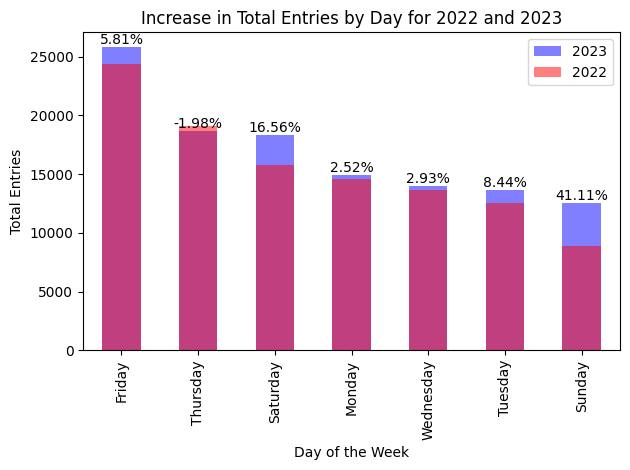

In [53]:
# Chart the preferred_entry_date_day for 2023 against the preferred_entry_date_day for 2022
df_split["preferred_entry_date_day"].value_counts().plot(
    kind="bar", color="blue", alpha=0.5, label="2023"
)

df_split_2022["preferred_entry_date_day"].value_counts().plot(
    kind="bar", color="red", alpha=0.5, label="2022"
)

plt.xlabel("Day of the Week")

plt.ylabel("Total Entries")

# Show percentage increase from 2022 to 2023 next to each bar
for i in range(7):
    increase = (
        df_split["preferred_entry_date_day"].value_counts().iloc[i]
        - df_split_2022["preferred_entry_date_day"].value_counts().iloc[i]
    ) / df_split_2022["preferred_entry_date_day"].value_counts().iloc[i]
    plt.text(
        i,
        df_split["preferred_entry_date_day"].value_counts().iloc[i],
        f"{increase:.2%}",
        ha="center",
        # Add a little space between the text and the top of the bar
        va="bottom",
    )

plt.title("Increase in Total Entries by Day for 2022 and 2023")

plt.legend()

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig("increase_in_total_entries_by_day.png")

plt.show()

Perhaps word got out the Sunday and Saturday were out performing other days? Sunday saw a massive increase in applications in 2023 way out pacing growth in the other days. Similarly, Saturday saw the second highest increase.


In [36]:
# Get the total awarded permit entries by day of the week
df_awarded_by_day = (
    df_split_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_awarded_by_day

,Total Awarded
preferred_entry_date_day,
Sunday,468
Monday,359
Saturday,350
Friday,349
Thursday,347
Tuesday,345
Wednesday,340


In [37]:
# Get the total skipped permit entries by day of the week
df_skipped_by_day = (
    df_split_skipped["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Skipped")
)

df_skipped_by_day

,Total Skipped
preferred_entry_date_day,
Friday,25436
Thursday,18347
Saturday,18017
Monday,14591
Wednesday,13665
Tuesday,13282
Sunday,12029


In [38]:
# Merge awarded and skipped by day of the week
df_awarded_skipped_by_day = pd.merge(
    df_awarded_by_day,
    df_skipped_by_day,
    on="preferred_entry_date_day",
)

# Calculate ratio of awarded to skipped
df_awarded_skipped_by_day["ratio"] = (
    df_awarded_skipped_by_day["Total Awarded"]
    / df_awarded_skipped_by_day["Total Skipped"]
)

# Only show two decimals for ratio
df_awarded_skipped_by_day["ratio"] = df_awarded_skipped_by_day["ratio"].map(
    "{:.3f}".format
)

# Sort by ratio
df_awarded_skipped_by_day = df_awarded_skipped_by_day.sort_values(
    by="ratio", ascending=False
)

# Sort the columns
df_awarded_skipped_by_day = df_awarded_skipped_by_day[
    ["Total Awarded", "Total Skipped", "ratio"]
]

# Show dataframe
df_awarded_skipped_by_day

,Total Awarded,Total Skipped,ratio
preferred_entry_date_day,,,
Sunday,468,12029,0.039
Tuesday,345,13282,0.026
Monday,359,14591,0.025
Wednesday,340,13665,0.025
Saturday,350,18017,0.019
Thursday,347,18347,0.019
Friday,349,25436,0.014


Sunday remained the best day to apply in 2023 but the margins closed due to the outsized increase in Sunday applications. The stratification of days lines up with the recommendations that we typiically see or hear.

Not only did Sunday's lead shrink, Saturday and Monday more or less switched places from 2022.


## Core Enchantment Zone


In [39]:
# Filter the df_split dataframe for only entries for Core Enchantment Zone
core_filter = df_split["preferred_zone"] == "Core Enchantment Zone"

df_split_core = df_split[core_filter]

# Filter the df_split_core dataframe for only awarded entries
awarded_filter = df_split_core["awarded"] == True

df_split_core_awarded = df_split_core[awarded_filter]

# Filter the skipped data frame for only Core Enchantment Zone entries
df_split_skipped_core = df_split_skipped[
    df_split_skipped["preferred_zone"] == "Core Enchantment Zone"
]

### Month


In [40]:
# Show the total entries by month for Core Enchantment Zone
df_split_core["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       27160
July         19125
September    18558
June          5455
October       4451
May            867
Name: count, dtype: int64

In [41]:
# Get the Core Enchantment Zone entries awarded by month and create a dataframe
df_core_awarded_by_month = (
    df_split_core_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,141
July,134
June,125
May,76
October,133
September,128


In [42]:
# Get the total of Core Enchantment Zone permits skipped by month
df_core_skipped_by_month = (
    df_split_skipped_core.groupby("preferred_entry_date_month")
    .size()
    .to_frame(name="Total Skipped")
)

df_core_skipped_by_month

,Total Skipped
preferred_entry_date_month,
August,27019
July,18991
June,5330
May,791
October,4318
September,18430


In [43]:
# Merge awarded and skipped by month for Core Enchantment Zone
df_core_awarded_skipped_by_month = pd.merge(
    df_core_awarded_by_month,
    df_core_skipped_by_month,
    on="preferred_entry_date_month",
)

# Calculate ratio of awarded to skipped for Core Enchantment Zone
df_core_awarded_skipped_by_month["ratio"] = (
    df_core_awarded_skipped_by_month["Total Awarded"]
    / df_core_awarded_skipped_by_month["Total Skipped"]
)

# Only show two decimals for ratio
df_core_awarded_skipped_by_month["ratio"] = df_core_awarded_skipped_by_month[
    "ratio"
].map("{:.3f}".format)

# Sort by ratio
df_core_awarded_skipped_by_month = df_core_awarded_skipped_by_month.sort_values(
    by="ratio", ascending=False
)

# Sort the columns
df_core_awarded_skipped_by_month = df_core_awarded_skipped_by_month[
    ["Total Awarded", "Total Skipped", "ratio"]
]

# Show dataframe
df_core_awarded_skipped_by_month

,Total Awarded,Total Skipped,ratio
preferred_entry_date_month,,,
May,76,791,0.096
October,133,4318,0.031
June,125,5330,0.023
July,134,18991,0.007
September,128,18430,0.007
August,141,27019,0.005


### Day of the Week


In [44]:
# Get the total entries awarded by day of the week in the Core Zone
df_core_awarded_by_day = (
    df_split_core_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_day

,Total Awarded
preferred_entry_date_day,
Sunday,145
Monday,106
Tuesday,103
Wednesday,96
Thursday,96
Saturday,96
Friday,95


In [45]:
# Get the total entries skipped by day of the week in the Core Zone
df_core_skipped_by_day = (
    df_split_skipped_core["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Skipped")
)

df_core_skipped_by_day

,Total Skipped
preferred_entry_date_day,
Friday,15922
Thursday,12197
Saturday,11503
Monday,9457
Wednesday,9312
Tuesday,9019
Sunday,7469


In [46]:
# Merge awarded and skipped by day of the week for Core Enchantment Zone
df_core_awarded_skipped_by_day = pd.merge(
    df_core_awarded_by_day,
    df_core_skipped_by_day,
    on="preferred_entry_date_day",
)

# Calculate ratio of awarded to skipped for Core Enchantment Zone
df_core_awarded_skipped_by_day["ratio"] = (
    df_core_awarded_skipped_by_day["Total Awarded"]
    / df_core_awarded_skipped_by_day["Total Skipped"]
)

# Only show two decimals for ratio
df_core_awarded_skipped_by_day["ratio"] = df_core_awarded_skipped_by_day["ratio"].map(
    "{:.3f}".format
)

# Sort by ratio
df_core_awarded_skipped_by_day = df_core_awarded_skipped_by_day.sort_values(
    by="ratio", ascending=False
)

# Sort the columns
df_core_awarded_skipped_by_day = df_core_awarded_skipped_by_day[
    ["Total Awarded", "Total Skipped", "ratio"]
]

# Show dataframe
df_core_awarded_skipped_by_day

,Total Awarded,Total Skipped,ratio
preferred_entry_date_day,,,
Sunday,145,7469,0.019
Monday,106,9457,0.011
Tuesday,103,9019,0.011
Wednesday,96,9312,0.010
Thursday,96,12197,0.008
Saturday,96,11503,0.008
Friday,95,15922,0.006


### Group Size


In [47]:
# Show total entries by group size for Core Enchantment Zone
df_split_core["minimum_acceptable_group_size"].value_counts()

minimum_acceptable_group_size
4    23122
2    14622
8    13149
6    12432
3     5255
5     5010
1     1064
7      962
Name: count, dtype: int64

In [48]:
# Get the total number of awarded permits by group size in Core Enchantment Zone
df_core_awarded_by_group_size = (
    df_split_core_awarded["minimum_acceptable_group_size"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_awarded_by_group_size

,Total Awarded
minimum_acceptable_group_size,
4,202
2,199
8,87
6,78
3,65
1,60
5,40
7,6


In [49]:
# Get the total number of skipped permits by group size in Core Enchantment Zone
df_core_skipped_by_group_size = (
    df_split_skipped_core["minimum_acceptable_group_size"]
    .value_counts()
    .to_frame(name="Total Skipped")
)

df_core_skipped_by_group_size

,Total Skipped
minimum_acceptable_group_size,
4,22920
2,14423
8,13062
6,12354
3,5190
5,4970
1,1004
7,956


In [50]:
# Merge awarded and skipped by group size for Core Enchantment Zone
df_core_awarded_skipped_by_group_size = pd.merge(
    df_core_awarded_by_group_size,
    df_core_skipped_by_group_size,
    on="minimum_acceptable_group_size",
)

# Calculate ratio of awarded to skipped for Core Enchantment Zone
df_core_awarded_skipped_by_group_size["ratio"] = (
    df_core_awarded_skipped_by_group_size["Total Awarded"]
    / df_core_awarded_skipped_by_group_size["Total Skipped"]
)

# Only show two decimals for ratio
df_core_awarded_skipped_by_group_size["ratio"] = df_core_awarded_skipped_by_group_size[
    "ratio"
].map("{:.3f}".format)

# Sort by ratio
df_core_awarded_skipped_by_group_size = (
    df_core_awarded_skipped_by_group_size.sort_values(by="ratio", ascending=False)
)

# Sort the columns
df_core_awarded_skipped_by_group_size = df_core_awarded_skipped_by_group_size[
    ["Total Awarded", "Total Skipped", "ratio"]
]

# Show dataframe
df_core_awarded_skipped_by_group_size

,Total Awarded,Total Skipped,ratio
minimum_acceptable_group_size,,,
1,60,1004,0.060
2,199,14423,0.014
3,65,5190,0.013
4,202,22920,0.009
5,40,4970,0.008
8,87,13062,0.007
6,78,12354,0.006
7,6,956,0.006


### Entrance awarded by day of the week in August for Core Enchantment Zone


In [51]:
# Filter the df_split_core dataframe for August entries
august_filter = df_split_core["preferred_entry_date_month"] == "August"

df_split_core_august = df_split_core[august_filter]

# Filter the df_split_core_august dataframe for only awarded entries
awarded_august_filter = df_split_core_august["awarded"] == True

df_split_core_august_awarded = df_split_core_august[awarded_august_filter]

# Sum the awarded_group_size column by day of the week
df_core_august_awarded_by_day = (
    df_split_core_august_awarded.groupby("preferred_entry_date_day")[
        "awarded_group_size"
    ]
    .sum()
    .to_frame(name="Awarded Sunday Entrance in August Core Zone")
)

# Add column totaling the number of occurences each day had in August, i.e., August had 4 Sundays
df_core_august_awarded_by_day["Total Days"] = df_split_core_august_awarded.groupby(
    "preferred_entry_date_day"
)["preferred_entry_date"].nunique()

# Calculate the average group size for each day of the week in August
df_core_august_awarded_by_day["Average Awarded/Day"] = (
    df_core_august_awarded_by_day["Awarded Sunday Entrance in August Core Zone"]
    / df_core_august_awarded_by_day["Total Days"]
)

# Sort by Awarded Sunday Entrance in August Core Zone
df_core_august_awarded_by_day = df_core_august_awarded_by_day.sort_values(
    by="Awarded Sunday Entrance in August Core Zone", ascending=False
)

df_core_august_awarded_by_day

,Awarded Sunday Entrance in August Core Zone,Total Days,Average Awarded/Day
preferred_entry_date_day,,,
Sunday,96,4,24.0
Thursday,80,5,16.0
Tuesday,80,5,16.0
Wednesday,80,5,16.0
Friday,64,4,16.0
Monday,64,4,16.0
Saturday,64,4,16.0


### Awarded group size on Sunday in August for Core Enchantment Zone


In [52]:
# Filter the August data for only Sundays
sunday_filter = df_split_core_august_awarded["preferred_entry_date_day"] == "Sunday"

df_split_core_august_awarded_sunday = df_split_core_august_awarded[sunday_filter]

# Get the total number of awarded permits by group size in Core Enchantment Zone for August Sundays
df_core_august_sunday_awarded_by_group_size = (
    df_split_core_august_awarded_sunday["awarded_group_size"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_core_august_sunday_awarded_by_group_size

,Total Awarded
awarded_group_size,
2,9
4,9
1,4
8,3
5,1
3,1
6,1


Despite many aspects of the lottery system and application percentages remaining the same, the awarded group size on Sunday in August for the Core Enchantments seems to have remained the same from 2022 and 2023, erasing the claim that larger group sizes do better on Sundays from 2021.

In 2021, group sizes of 8 were awarded 7 times, which was more than group sizes of 2, 6, and 1. However, in 2022 and 2023 the group size of 8 was awarded only 3 times respectively.
